In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Snippet for plotting vectors with colors:

In [2]:
def plot_vectors(vectors, color):
    origin = [0, 0]
    plt.grid(visible=True)
    for idx, vector in enumerate(vectors):
        plt.quiver(
            [origin[0]],
            [origin[1]],
            [vector[0]],
            [vector[1]],
            color=color[idx],
            angles='xy',
            scale_units='xy',
            scale=1.)
    plt.gca().set_aspect('equal')

### Effect of matrix multiplication on vectors

When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we apply the matrix to the vector, it means that we calculate the dot product of the matrix with the vector.
The transformed vector is rescaled & rotated version of the original vector.

Let's have vector $v = 2\hat{i} + 2\hat{j}$. In matrix form, it can be written as $v=[2, 2]$. Graphically this vector looks like the following.

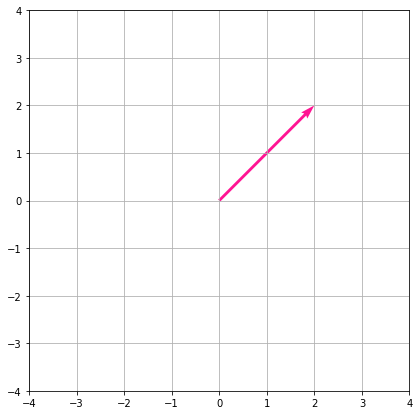

In [3]:
v = np.array([2, 2])
plt.figure(figsize=(7, 7))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plot_vectors([v], color=["deeppink"])

For simplicity, we'll do multiplication with diagonal matrix, 
$$
D = \begin{bmatrix}
2 & 0\\
0 & 2
\end{bmatrix}
$$

In [4]:
D = np.array([[2, 0], [0, 2]])

In [5]:
np.dot(D, v)

array([4, 4])

Multiplication with diagonal matrix $D$ with same diagonal values gives us scaled version of original vector $v$.

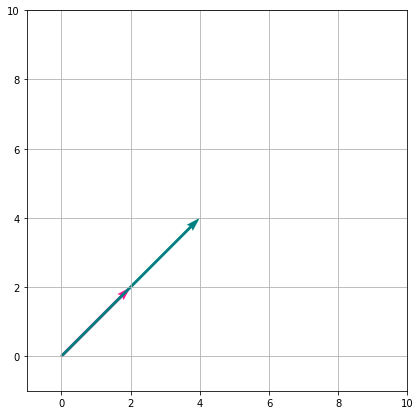

In [6]:
plt.figure(figsize=(7, 7))
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plot_vectors([v, np.dot(D, v)], color=["deeppink", "teal"])

#### Example 2:
Now, we'll try different values for diagonal elements, such that
$$
D = \begin{bmatrix}
2 & 0\\
0 & 3
\end{bmatrix}
$$

In [7]:
D = np.array([[2, 0], [0, 3]])

In [8]:
[np.dot(D, v)]

[array([4, 6])]

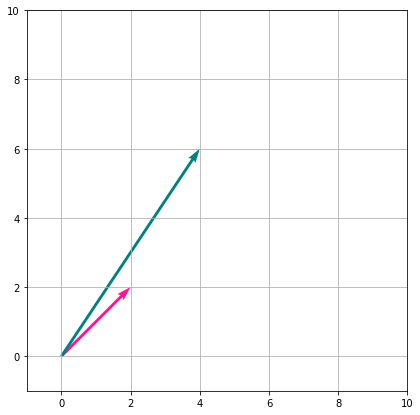

In [9]:
plt.figure(figsize=(7, 7))
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plot_vectors([v, np.dot(D, v)], color=["deeppink", "teal"])

#### Example 3:
For 
$$
D = \begin{bmatrix}
2 & 1\\
-3 & 2
\end{bmatrix}
$$

In [10]:
D = np.array([[2, 1], [-3, 2]])

In [11]:
np.dot(D, v)

array([ 6, -2])

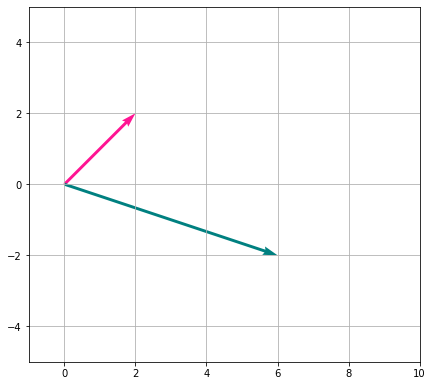

In [12]:
plt.figure(figsize=(7, 7))
plt.xlim(-1, 10)
plt.ylim(-5, 5)
plot_vectors([v, np.dot(D, v)], color=["deeppink", "teal"])

## Eigenvector & Eigenvalues

An eigenvector of a square matrix $A$ is a nonzero vector $v$ such that multiplication by $A$ alters only the scale of $v$:
$$ Av = \lambda v $$
the scalar $\lambda$ is known as the eigenvalue corresponding to this eigenvector.

In [13]:
A = np.array([[1,2], [3,2]])

Eigenvectors & eigenvalues in python can be calculated using `numpy.linalg.eig` function. The function takes a square matrix & returns a tuple containing eigenvalues & eigenvectors.

In [14]:
eig_val, eig_vec = np.linalg.eig(A)
print("Eigenvalues:", eig_val)
print("Eigenvectors:", eig_vec)

Eigenvalues: [-1.  4.]
Eigenvectors: [[-0.70710678 -0.5547002 ]
 [ 0.70710678 -0.83205029]]


In the returned eigenvector matrix(second element of tuple), eigenvectors are along the each column. 

In [15]:
print(f"1st Eigenvalue is: {eig_val[0]} & 2nd Eigenvalue is: {eig_val[1]}.")
print(f"1st Eigenvector is: {eig_vec[:, 0]} & 2nd Eigenvector is: {eig_vec[:, 1]}.")

1st Eigenvalue is: -1.0 & 2nd Eigenvalue is: 4.0.
1st Eigenvector is: [-0.70710678  0.70710678] & 2nd Eigenvector is: [-0.5547002  -0.83205029].


Now, let's check validity of above equation.

For $1^{st}$ vector:

In [16]:
eig_vec_a = eig_vec[:, 0]
eig_val_a = eig_val[0]

L.H.S: $Av$

In [17]:
np.dot(A, eig_vec_a)

array([ 0.70710678, -0.70710678])

R.H.S: $\lambda v$

In [18]:
eig_val_a * eig_vec_a

array([ 0.70710678, -0.70710678])

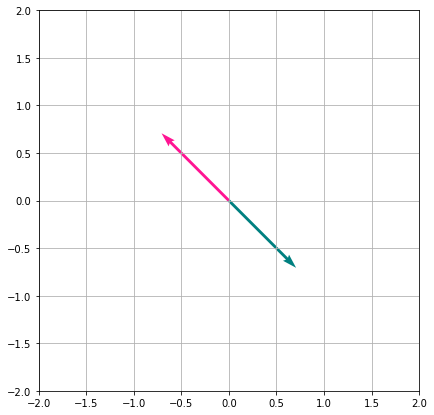

In [19]:
plt.figure(figsize=(7, 7))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plot_vectors(
    [eig_vec_a, np.dot(A, eig_vec_a)],
    color=["deeppink", "teal"])

For $2^{nd}$ vector:

In [20]:
eig_vec_b = eig_vec[:, 1]
eig_val_b = eig_val[1]

L.H.S: $Av$

In [21]:
np.dot(A, eig_vec_b)

array([-2.21880078, -3.32820118])

R.H.S: $\lambda v$

In [22]:
eig_val_b * eig_vec_b

array([-2.21880078, -3.32820118])

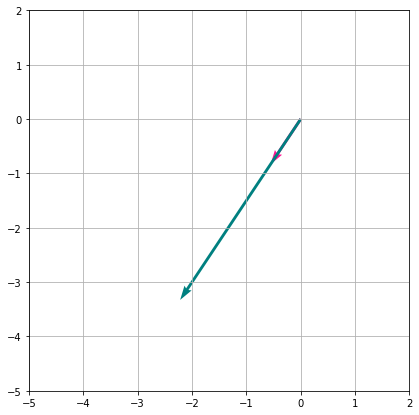

In [23]:
plt.figure(figsize=(7, 7))
plt.xlim(-5, 2)
plt.ylim(-5, 2)
plot_vectors([eig_vec_b], color=["deeppink"])
plot_vectors([np.dot(A, eig_vec_b)], color=["teal"])

What if we have rescaled version of a eigenvector?
<br>If $v$ is an eigenvector $A$, then any rescaled vector $sv$, where $s \in R, s \ne 0$, is also an eigenvector. Moreover, $sv$ still has the same eigenvalue. For this reason, we generally are interested in unit eigenvectors. So, to keep eigenvectors un unit norm, the scaling is provided to the eigenvalues. See below example:

In [24]:
np.linalg.eig(A)

(array([-1.,  4.]),
 array([[-0.70710678, -0.5547002 ],
        [ 0.70710678, -0.83205029]]))

In [25]:
np.linalg.eig(3*A)

(array([-3., 12.]),
 array([[-0.70710678, -0.5547002 ],
        [ 0.70710678, -0.83205029]]))

Notice we have same eigenvectors in both cases (because we are always interested in unit eigenvectors) & the effect of scaling is seen only in eigenvalues. In short, __scale eigenvectors & keep eigenvalues same__ or __scale eigenvalues & keep eigenvectors same__, both are same thing.

Now let's see effect of matrix multiplication on unit circle (all possible unit vectors) & eigenvectors of identity matrix.

In [26]:
def plot_transformed_circle(matrix):
    # Taking parametric form of equation of the circle: x^2 + y^2 = r^2
    # Where x = cos(t) & y = sin(t)
    t = np.linspace(0, 2*np.pi, 1000)
    x = np.cos(t)
    y = np.sin(t)
    # Alternative way:
    # Taking standard form of equation of the circle: x^2 + y^2 = r^2
    # x = np.linspace(-1, 1, 1000)
    # y = np.sqrt(1 - x**2)
    # y_neg = -1 * y
    coords = np.array([x, y])
    transformed_x, transformed_y = np.dot(matrix, coords)
    plt.figure(figsize=(7, 7))
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.grid(visible=True)
    transformed_matrix = np.dot(matrix, np.identity(2))
    eig_vals, eig_vecs = np.linalg.eig(transformed_matrix)
    plot_vectors(
        [
            eig_vals[0] * eig_vecs[:, 0],
            eig_vals[1] * eig_vecs[:, 1]
        ],
        color=["r", "b"]
    )
    plt.plot(transformed_x, transformed_y, color="purple")
    plt.gca().set_aspect('equal')

Circle without transformation:


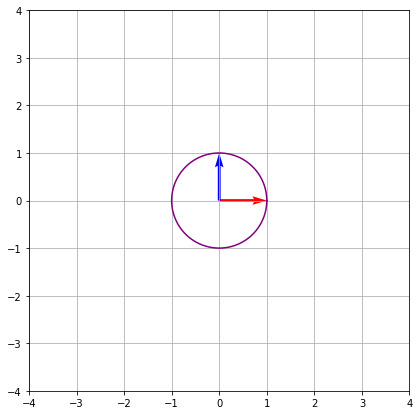

In [27]:
print("Circle without transformation:")
plot_transformed_circle(np.identity(2))

In [28]:
A = np.array([[1,2], [3,2]])
A

array([[1, 2],
       [3, 2]])

Circle with transformation:


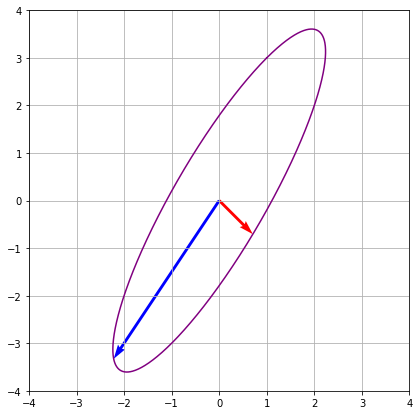

In [29]:
print("Circle with transformation:")
plot_transformed_circle(A)

## Eigendecomposition

We know that eigenvector $v$ of matrix $A$ follows:
$$ Av = \lambda v $$

Here $v$ is an $n$-dimensional vector represented as $v = v_1\hat{i_1} + v_2\hat{i_2} + ... + v_n\hat{i_n}$.
<br>It can also be written in matrix form as:

$$
v = \begin{bmatrix}
v_1\\
v_2\\
.\\
.\\
.\\
v_n
\end{bmatrix}_{nx1}
$$

We have $n$ such $n$-dimensional vectors, because it's a square matrix(no. of columns = no. of rows).
Each vector $v_p$, where $1<=p<=n$, can be written as:
$v_p = v_{p1}\hat{i_1} + v_{p2}\hat{i_2} + ... + v_{pn}\hat{i_n}$

Writing all these eigenvectors in matrix $V$:
$$
V = \begin{bmatrix}
v_{11} & v_{21} & ... & v_{n1}\\
v_{12} & v_{22} & ... & v_{n2}\\
. & . & ... & .\\
. & . & ... & .\\
. & . & ... & .\\
v_{n1} & v_{n1} & ... & v_{nn}
\end{bmatrix}_{nxn}
$$

Each eigenvector is associated with an eigenvalue. So:
$$
\Lambda = \begin{bmatrix}
\lambda_1 & 0 & ... & 0\\
0 & \lambda_2 & ... &0\\
. & . & ... & .\\
. & . & ... & .\\
. & . & ... & .\\
0 & 0 & ... & \lambda_n
\end{bmatrix}_{nxn}
$$

The equation can be rewritten for all eigenvectors & eigenvalues altogether.
$$AV = V\Lambda$$
Post-multiplying $V^{-1}$ both sides, we get:
$$AVV^{-1} = V\Lambda V^{-1}$$
$$AI = V\Lambda V^{-1}$$
$$A = V\Lambda V^{-1}$$
This formula is called __eigendecomposition__ of the matrix.

Let's see if the above formula works for our matrix.

In [30]:
A = np.array([[1,2], [3,2]])
A

array([[1, 2],
       [3, 2]])

In [31]:
eig_vals, eig_vecs = np.linalg.eig(A)

In [32]:
eig_val_mat = np.diag(eig_vals)
eig_val_mat

array([[-1.,  0.],
       [ 0.,  4.]])

In [33]:
np.linalg.multi_dot((eig_vecs, eig_val_mat, np.linalg.inv(eig_vecs)))

array([[1., 2.],
       [3., 2.]])

In [34]:
A

array([[1, 2],
       [3, 2]])

Both are same!!!

### Eigendecomposition for symmetric matrix

Let's create a symmetric matrix, 
$$
A = \begin{bmatrix}
3 & 5 & -1\\
5 & -4 & 7\\
-1 & 7 & 0
\end{bmatrix}
$$

In [35]:
A = np.array([[3, 5, -1,], [5, -4, 7], [-1, 7, 0]])

In [36]:
eig_vals, eig_vecs = np.linalg.eig(A)

In [37]:
eig_vals

array([-10.83928181,   2.78607154,   7.05321027])

In [38]:
eig_vecs

array([[ 0.32107909, -0.7194394 ,  0.61588567],
       [-0.78179935,  0.1656826 ,  0.60111484],
       [ 0.53450724,  0.67450443,  0.50926004]])

One interesting property with eigenvector matrix $V$ of symmetric matrix $A$ is that $V$ is __orthogonal__. And since $V$ is orthogonal, we can say:
$$ V^T = V^{-1} $$

So the eigendecomposition formula for symmetric matrix becomes:
$$A = V\Lambda V^T$$

Let's verify that:

In [39]:
np.around(np.linalg.multi_dot((eig_vecs, np.diag(eig_vals), eig_vecs.T)), decimals=3)

array([[ 3.,  5., -1.],
       [ 5., -4.,  7.],
       [-1.,  7.,  0.]])

Specifically, every real symmetric matrix is guaranteed to have an eigendecomposition.

We can think matrix & vector/matrix(collection of vectors) multiplication as a step-by-step transformation of the vector.
Mathematically speaking, matrix multiplication between $A$ & $v$ is $Av$, where number of columns. in $A$ must be equal to number of rows(dimensions) in $v$.
<br>Now, we can easily decompose $A$ using eigendecomposition.
$$ Av = (V\Lambda V^{-1}) v$$
Using associative property:
$$ (V\Lambda V^{-1}) v = (V(\Lambda (V^{-1} v)))$$
Let's check the transformation:

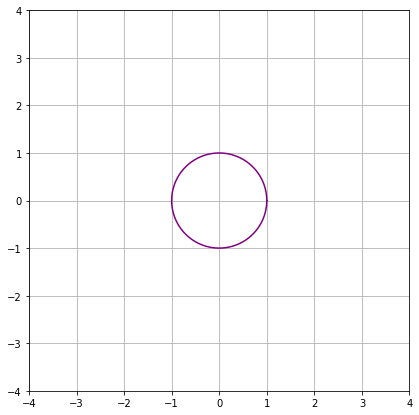

In [40]:
# Taking parametric form of equation of the circle: x^2 + y^2 = r^2
# Where x = cos(t) & y = sin(t)
t = np.linspace(0, 2*np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
# Alternative way:
# Taking standard form of equation of the circle: x^2 + y^2 = r^2
# x = np.linspace(-1, 1, 1000)
# y = np.sqrt(1 - x**2)
# y_neg = -1 * y
plt.figure(figsize=(7, 7))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
coords = np.array([x, y])
plt.grid(visible=True)
plt.plot(x, y, color="purple")
plt.gca().set_aspect('equal')

In [41]:
A = np.array([[1,2], [3,2]])
A

array([[1, 2],
       [3, 2]])

In [42]:
eig_vals, eig_vecs = np.linalg.eig(A)

First transformation: $V^{-1} v$

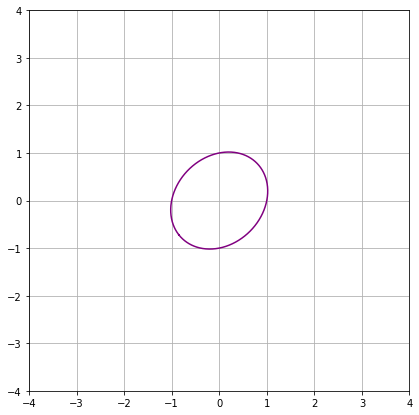

In [43]:
plt.figure(figsize=(7, 7))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
coords = np.array([x, y])
V_inv_v = np.dot(np.linalg.inv(eig_vecs), coords)
plt.grid(visible=True)
plt.plot(V_inv_v[0], V_inv_v[1], color="purple")
plt.gca().set_aspect('equal')

Second transformation: $\Lambda (V^{-1} v))$

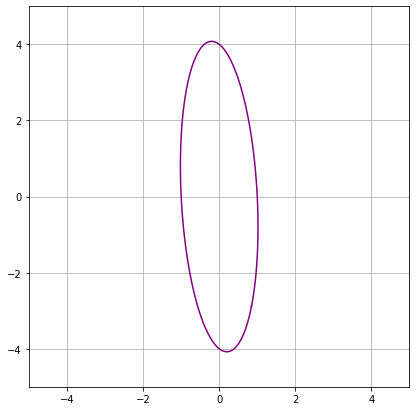

In [44]:
plt.figure(figsize=(7, 7))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
Lambda_V_inv_v = np.dot(np.diag(eig_vals), V_inv_v)
plt.grid(visible=True)
plt.plot(Lambda_V_inv_v[0], Lambda_V_inv_v[1], color="purple")
plt.gca().set_aspect('equal')

Third transformation: $V(\Lambda (V^{-1} v))$

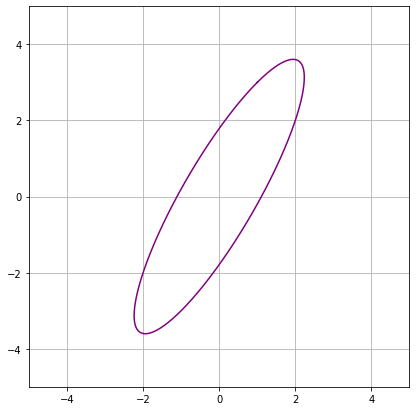

In [45]:
plt.figure(figsize=(7, 7))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
V_Lambda_V_inv_v = np.dot(eig_vecs, Lambda_V_inv_v)
plt.grid(visible=True)
plt.plot(V_Lambda_V_inv_v[0], V_Lambda_V_inv_v[1], color="purple")
plt.gca().set_aspect('equal')

Let's compare all by plotting them altogether.

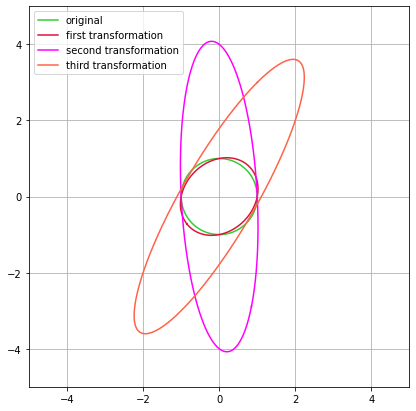

In [46]:
plt.figure(figsize=(7, 7))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
coords = np.array([x, y])
V_inv_v = np.dot(np.linalg.inv(eig_vecs), coords)
plt.grid(visible=True)
colors = ["limegreen", "crimson", "fuchsia", "tomato"]
plt.plot(x, y, color=colors[0])
plt.plot(V_inv_v[0], V_inv_v[1], color=colors[1])
plt.plot(Lambda_V_inv_v[0], Lambda_V_inv_v[1], color=colors[2])
plt.plot(V_Lambda_V_inv_v[0], V_Lambda_V_inv_v[1], color=colors[3])
plt.legend(labels=["original", "first transformation", "second transformation", "third transformation"])
plt.gca().set_aspect('equal')

### Applications of eigendecomposition:

#### 1. Eigenvectors & eigenvalues of inverse matrix:
We know that $A = V\Lambda V^{-1}$. So, 
$$(A)^{-1} = (V\Lambda V^{-1})^{-1}$$
$$A^{-1} = (V\Lambda V^{-1})^{-1}$$
Using matrix property, $ (ABC)^{-1} = C^{-1}B^{-1}A^{-1}$, we get
$$A^{-1} = (V^{-1})^{-1}(\Lambda)^{-1} (V)^{-1}$$
<br>
$$A^{-1} = V\Lambda^{-1}V^{-1}$$
<br>
Since this equation is eigendecomposition of $A^{-1}$, we can say that $V$ is an eigenvector matrix of $A^{-1}$, which means $A$ & $A^{-1}$, both have same eigenvectors. $\Lambda^{-1}$ is the eigenvalues of $A^{-1}$.
$\Lambda$ is a diagonal matrix containing eigenvalues of $A$, where $\Lambda_{ii} = \lambda_{i}$, hence $\Lambda^{-1}$ can be easily calculated by doing $\Lambda^{-1}_{ii} = \frac{1}{\lambda_{i}}$ (property of diagonal matrix), where $\lambda_{i} \ne 0$.


#### 2. Optimizing quadratic equations:
Quadratic equations can be expressed in matrix form.
$$f(x)= \begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix} = x^TAx$$

$$f(x)=ax^2_1+(b+c)x_1x_2+dx_2^2$$

For simplicity let's take symmetric matrix.
$$f(x)= \begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
\begin{bmatrix}
a & b\\
b & d
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix} = x^TAx$$

$$f(x)=ax^2_1+2bx_1x_2+dx_2^2$$
To optimize the equation, we have to get rid of cross terms (non-squared terms). For that we have to get rid of everything in the matrix except for the main diagonal.
We can do __change in variable__ using __Principal Axes Theorem__.
<br><br>__Principal Axes Theorem__:
<br> We can substitute $x=Py$ in quadratic equation $x^TAx$, where $P$ is a matrix. 
$$x^TAx = (Py)^TA(Py)$$
$$x^TAx = y^TP^TAPy$$
$$x^TAx = y^T(P^TAP)y$$
<br><br>We have eigendecomposition equation for symmetric matrix, $$A = V\Lambda V^T$$
Pre-multiply both sides with $V^T$, $$V^TA = V^TV\Lambda V^T$$
We also know that $V$ is orthogonal matrix, so $V^TV = I$.
$V^T$, $$V^TA = \Lambda V^T$$
Post-multiply both sides with $V$, $$V^TAV = \Lambda V^TV$$
We, now have $$V^TAV = \Lambda $$
<br><br>
Look closely to both equations, viz, $$x^TAx = y^T(P^TAP)y$$ and $$V^TAV = \Lambda $$
In both equations $A$ is symmetric matrix. $(P^TAP)$ & $\Lambda$ are diagonal matrices. With that being said, $P$ can be eigenvector matrix of $A$, that means $(P^TAP)$ can be replaced by $\Lambda$.
The quadratic equation now changes to:
$$x^TAx = y^T\Lambda y$$ where $\Lambda$ is eigenvalues of $A$.
The equation can be rewritten as
$$f(x)= \begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2
\end{bmatrix}
\begin{bmatrix}
y_1 & y_2
\end{bmatrix} = x^TAx = \lambda_1y^2_1+\lambda_2y_2^2$$
For n-variables we have: $f(x)=  \lambda_1y^2_1 + \lambda_2y_2^2 + ....... + \lambda_ny^2_n$
<br><br>To optimize quadratic expressions subject to $||x||_2$.
Since $x=Py$,
$$x^Tx = (Py)^TPy$$
$$x^Tx = y^TP^TPy$$
$x^Tx = y^Ty$ (because these are orthogonal matrix, hence $P^TP = I$)
$$||x|| = ||y|| = 1$$
$$y^2_1+y_2^2 = 1$$
Now optimizing $f(x) = \lambda_1y^2_1+\lambda_2y_2^2$, let's assume $\lambda_1 > \lambda_2$.
Then, $$\lambda_1y^2_1 \ge \lambda_2y^2_1$$
Adding $\lambda_2y_2^2$ both sides,
$$\lambda_1y^2_1 + \lambda_2y_2^2 \ge \lambda_2y^2_1 + \lambda_2y_2^2$$
$$\lambda_1y^2_1 + \lambda_2y_2^2 \ge \lambda_2(||y||_2)$$
$$\lambda_1y^2_1 + \lambda_2y_2^2 \ge \lambda_2$$
$$f(x) \ge \lambda_2$$
__Minimum value of $f(x)$ is $\lambda_2$. Similarly, Maximum value of $f(x)$ is $\lambda_1$.__
<br><br>
Instead of doing all these derivation, there is a shortcut.
$$f(x) = x^TAx$$
Let's assume $x$ as eigenvector of $A$,
$$f(x) = x^T\lambda x  = \lambda x^Tx = \lambda ||x||_2 = \lambda$$
$$f(x) = \lambda$$
Whenever $x$ is equal to an eigenvector of $A$, $f$ takes on the value if the correspoing eigenvalue. The maximum value of $f$ within the constraint region is the maximum eigenvalue & its minimum value within the constraint region is the minimum eigenvalue.

## Singular Value Decomposition
Earlier, we saw how to decompose matrix into eigenvalues & eigenvectors using eigendecomposition. The __singular value decomposition(SVD)__ provides another way to factorize/decompose a matrix, into __singular values__ & __singular vectors__. Every real matrix has a singular value decomposition, but the same is not true of the eigendecomposition. For example, if a matrix is not square the, eigendecomposition is not defined, and we must use a singular value decomposition instead.

We defined eigendecomposition as,
$$A = V\Lambda V^{-1}$$
The singular value decomposition is similar, except this time we will use product of three different matrices to form $A$,
$$A = UDV^T$$
Suppose $A$ is an $m \times n$ matrix. Then $U$ is defined to be an $m \times m$ matrix, $D$ to be an $m \times n$ matrix, and $V$ to be an $n \times n$ matrix.
The columns of $U$ are know as __left-singular vectors__ of $A$.
The elements along the diagonal of $D$ are know as __singular values__ of $A$.
The columns of $V$ are know as __right-singular vectors__ of $A$.

Let's calculate SVD in python for 
$$
A = \begin{bmatrix}
-3 & 0\\
3 & -3\\
4 & -4
\end{bmatrix}
$$

In [47]:
A = np.array([[-3,  0],
       [ 3, -3],
       [ 4, -4]])

In [48]:
U, D, V = np.linalg.svd(A)

__Left singular vectors matrix (U):__

In [49]:
U

array([[-0.31062008, -0.95053415,  0.        ],
       [ 0.57032049, -0.18637205, -0.8       ],
       [ 0.76042732, -0.24849607,  0.6       ]])

__Singular values matrix (D):__

In [50]:
D

array([7.40957297, 2.02440816])

We will generate it properly.

In [51]:
diag_matrix = np.zeros_like(A, dtype=np.float32)
np.fill_diagonal(diag_matrix, D)

In [52]:
diag_matrix

array([[7.409573, 0.      ],
       [0.      , 2.024408],
       [0.      , 0.      ]], dtype=float32)

__Right singular vectors matrix (V):__
<br>__Note__: $V$ by default is transposed, so don't have to transpose it.

In [53]:
V

array([[ 0.7671874 , -0.64142303],
       [ 0.64142303,  0.7671874 ]])

Let's multiply all three:

In [54]:
np.around(np.linalg.multi_dot((U,diag_matrix,V)), decimals=4)

array([[-3.,  0.],
       [ 3., -3.],
       [ 4., -4.]])

In [55]:
A

array([[-3,  0],
       [ 3, -3],
       [ 4, -4]])

Both are same!!!
<br>But how are $U$, $D$ and $V$ calculated?

__$U$ is eigenvectors of $AA^T$:__
<br><br>
Proof: Since,
$$A = UDV^T$$
$$A^T = (UDV^T)^T$$
Multiplying both, we get:
$$AA^T = UDV^T(UDV^T)^T = UDV^TVD^TU^T$$
<br>
$$\hspace{5cm}AA^T = UDD^TU^T     \hspace{3cm}  \because (V^TV = I) $$
<br>
The above expession can be compared with __eigen decomposition__ and it is evident that $U$ is eigenvector matrix of $AA^T$.

In [56]:
U_hat = np.linalg.eig(np.matmul(A, A.T))[1]
U_hat

array([[-0.95053415, -0.31062008,  0.        ],
       [-0.18637205,  0.57032049, -0.8       ],
       [-0.24849607,  0.76042732,  0.6       ]])

In [57]:
U

array([[-0.31062008, -0.95053415,  0.        ],
       [ 0.57032049, -0.18637205, -0.8       ],
       [ 0.76042732, -0.24849607,  0.6       ]])

__Note:__ Since each column of eigenvector matrix represent an eigenvector, we might have a different order or sign(opposite direction) in eigenvectors. This does not change the fact that $U=eigenvectors(AA^T)$. We generally use numpy's SVD to be more accurate in eigenvector's order.
<br><br>
One more thing to notice is that singular values are ordered in descending manner. It means that initial singular values & singular vectors contain lot of information about the original matrix than the later ones.

__$D$ is square root of non-zero eigenvalues of $A^TA$ or $AA^T$:__
<br><br>
Proof: The proof for $U$ tells us that eigen values of $AA^T$ is equal to $DD^T$. So, conversely, $D$ is equal to the square root of non-zero eigen-values of $AA^T$.

In [58]:
D_hat = np.sqrt(np.around(np.linalg.eig(np.matmul(A, A.T))[0], decimals=6))
D_hat

array([2.02440806, 7.409573  , 0.        ])

In [59]:
D_hat2 = np.sqrt(np.around(np.linalg.eig(np.matmul(A.T, A))[0], decimals=6))
D_hat2

array([7.409573  , 2.02440806])

In [60]:
D

array([7.40957297, 2.02440816])

__$V$ is eigenvectors of $A^TA$:__
Proof: Since,
$$A = UDV^T$$
$$A^T = (UDV^T)^T$$
Multiplying both, we get:
$$A^TA = (UDV^T)^TUDV^T = VD^TU^TUDV^T$$
<br>
$$\hspace{5cm}AA^T  = VD^TDV^T    \hspace{3cm}  \because (U^TU = I) $$
<br>
The above expession can be compared with __eigen decomposition__ and it is evident that $V$ is eigenvector matrix of $A^TA$.

In [61]:
V_hat = np.linalg.eig(np.matmul(A.T, A))[1].T
V_hat

array([[ 0.7671874 , -0.64142303],
       [ 0.64142303,  0.7671874 ]])

In [62]:
V

array([[ 0.7671874 , -0.64142303],
       [ 0.64142303,  0.7671874 ]])

### Applications of SVD:

#### 1. Moore-Penrose Pseudo-inverse
Matrix inversion is not defined for matrices that are not square. Suppose we want to solve linear equation $Ax = b$, we'll take $A^{-1}$ both sides to make it $x = A^{-1}B$. Depending on the structure of the problem, it may not be possible to calculate $A^{-1}$.
<br><br>
If $A$ is taller than it is wide $(rows > columns)$, i.e., __overdetermined system of linear equations__, then it is possible for this equation to have no solution. If $A$ is wider than it is tall $(rows < columns)$, i.e., __underdetermined system of linear equations__, then there could be multiple possible solution.
<br><br>
Both the cases above, points to non-square matrix.
We know for any matrix $A$, SVD is defined as:
$$A = UDV^T$$
Then,
$$A^{-1} = (UDV^T)^{-1}$$
$$A^{-1} = (V^T)^{-1}D^{-1}U^{-1}$$
We also know that $U$ & $V$ are orthogonal matrices, so inverses would be equal to their corresponding transposes.
$$A^{-1} = (V^T)^TD^{-1}U^T$$
$$A^{-1} = VD^{-1}U^T$$
But, wait a minute!!!! Didn't we just say that _"Matrix inversion is not defined for matrices that are not square."_? Yes!! That is correct. Now, instead of saying that we are calculating inverse, we'll say we are calculating __pseudo-inverse__. Pseudo-inverse of matrix $A$ is expressed as $A^+$. So above equation becomes:
$$A^+ = VD^+U^T$$
Here both $A^+$ & $D^+$ are pseudo-inverses of $A$ & $D$.
<br>
$D^+$ is obtained by taking the reciprocal of its nonzero elements then taking the transpose of the resulting matrix.

The pseudo-inverse solves the system of linear equations in the least square error perspective: it finds the solution that minimize the error.

$$ AA^+≈I_n $$
minimizing
$$ ‖AA^+−I_n‖_2 $$

So, When we don't have a square matrix for system of equations, the solution becomes:
$$ x = A^+B $$

__Over-determined case__ ($n_{equations} > n_{variables}$):
<br>
In case of overdetermined system of equations, we don't have a solution(you can confirm that with below figure).

In [97]:
x = np.linspace(-10, 10, 50)
y1 = (1 - 2 * x) / 3    # 3x + 2y = 1
y2 = (x - 4) / 7    # x - 7y = 4
y3 = (12 + 4 * x) / 9   # -4x + 9y = 12

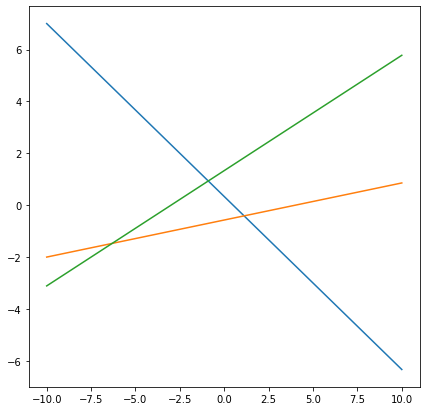

In [168]:
plt.figure(figsize=(7,7))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

Coefficient matrix:

In [106]:
A = np.array([[3, 2], [1, -7], [-4, 9]])
A

array([[ 3,  2],
       [ 1, -7],
       [-4,  9]])

Constant matrix:

In [108]:
B = np.array([[1], [4], [12]])
B

array([[ 1],
       [ 4],
       [12]])

Pseudo-inverse of $A$:

In [169]:
U, D, V = np.linalg.svd(A)
D_plus = np.zeros_like(A.T, dtype=np.float32)
np.fill_diagonal(D_plus, 1 / D)

A_plus = V @ D_plus @ U.T
A_plus

array([[ 0.22505911, -0.05910166, -0.09598109],
       [ 0.07706856, -0.06855792,  0.04066194]])

Let's confirm our result with numpy's own pseudo-inverse function.

In [166]:
np.linalg.pinv(A)

array([[ 0.2250591 , -0.05910165, -0.09598109],
       [ 0.07706856, -0.06855792,  0.04066194]])

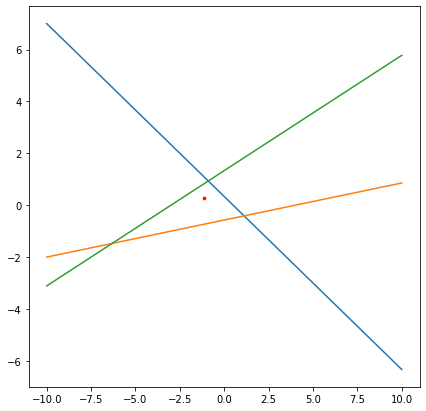

In [176]:
plt.figure(figsize=(7,7))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.scatter(*(A_plus @ B).flatten(), color="r", s=7)

We can use this implementation for implementing linear regression:

In [207]:
x = np.linspace(20, 80, 50)
m = 4
c = 10
random_error= np.random.randint(-30, 30, x.shape[0])
y = m*x + c + random_error

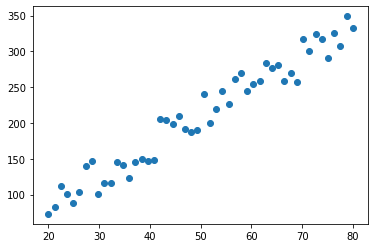

In [208]:
plt.scatter(x, y)

In [236]:
A = np.concatenate((x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)), axis=1)
B = y.reshape(-1, 1)

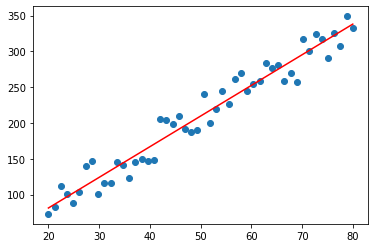

In [237]:
m_calc, c_calc = (np.linalg.pinv(A) @ B).flatten()

plt.scatter(x, y)
plt.plot(x, m_calc*x + c_calc, color="r")

__Under-determined case__ ($n_{equations} < n_{variables}$):
<br>
In case of under-determined system of equations, we have a multiple solutions possible. 
$$x = A^+B$$
In this case, pseudo-inverse computes solution $x = A^+B$, where $||x||_2$ is minimum/least.

#### 2. Dimensionality Reduction

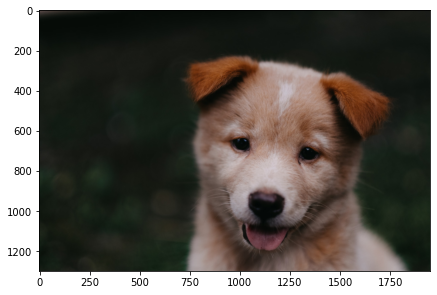

In [63]:
image = Image.open("../data/opencv/00-puppy.jpg")
plt.figure(figsize=(7,7))
plt.imshow(image)

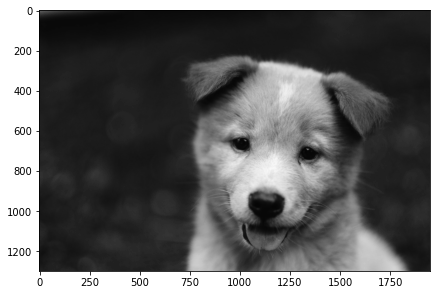

In [64]:
gray_img = np.array(image.convert(mode="L"))
plt.figure(figsize=(7,7))
plt.imshow(gray_img, cmap="gray")

In [65]:
U, D, V = np.linalg.svd(gray_img)

In [66]:
U.shape

(1300, 1300)

In [67]:
D.shape

(1300,)

In [68]:
V.shape

(1950, 1950)

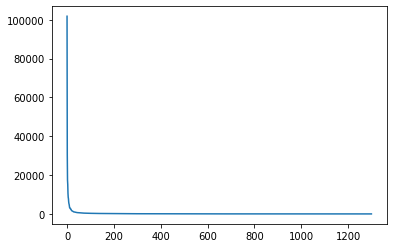

In [69]:
plt.plot(D)

See? After first 50(or even less than that) singular values, all singular values are approaching to zero.
<br>Let's create original image by taking first $i$ singular vectors & values into consideration.

In [70]:
num_val = list(range(1,5)) + list(range(5,55,5))

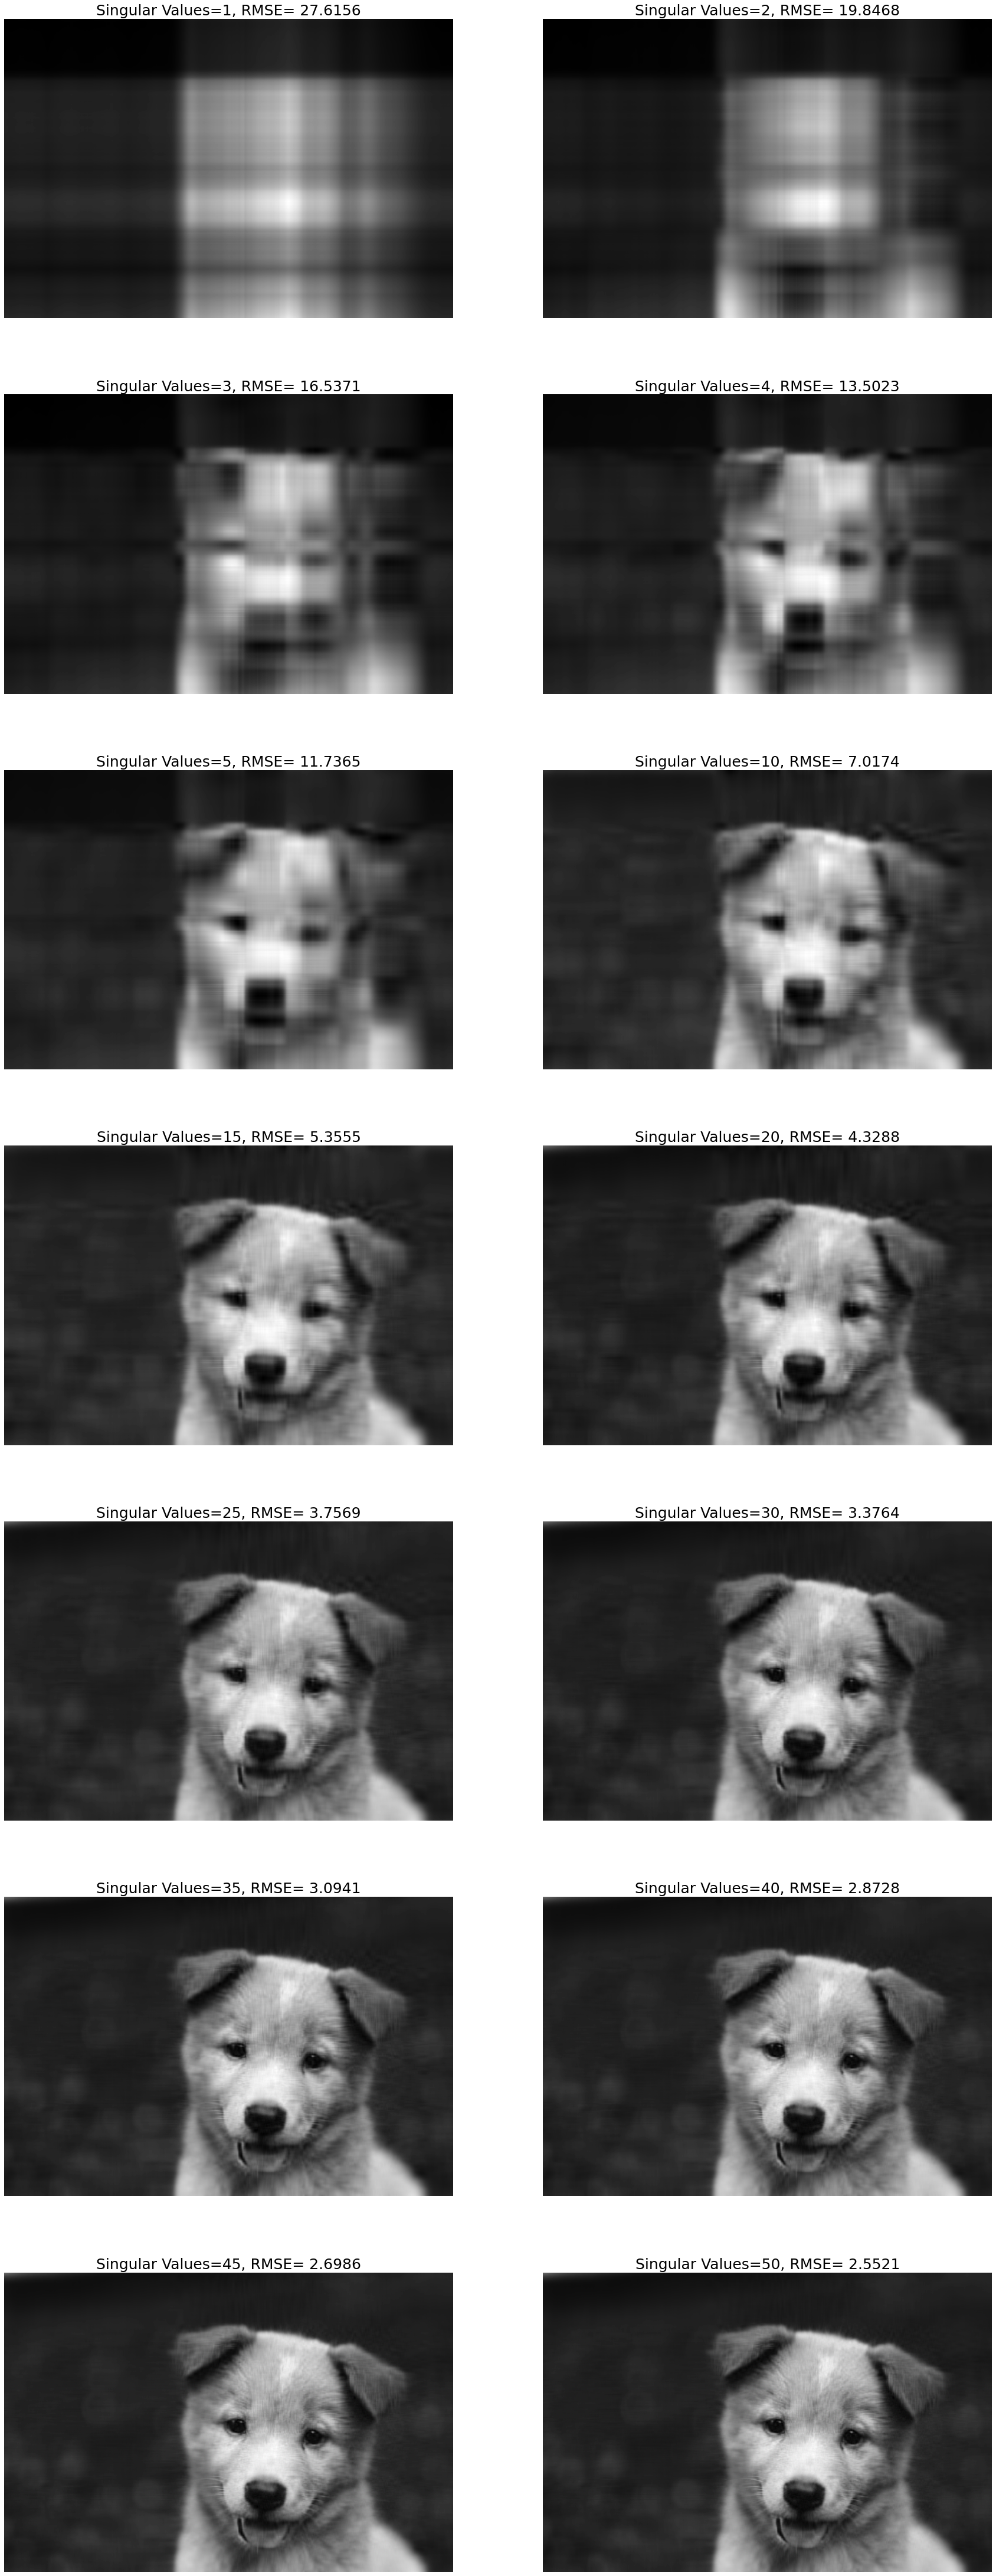

In [71]:
fig, ax = plt.subplots(7, 2, figsize=(30, 80))
for idx, val in enumerate(num_val):
    row = idx // 2
    col = idx % 2
    ax[row][col].axis('off')
    generated_image = np.array(np.matrix(U[:,:val]) @ np.diag(D[:val]) @ np.matrix(V[:val,:]))
    rmse = np.sqrt(np.mean(np.square(generated_image - np.array(gray_img))))
    ax[row][col].set_title(f"Singular Values={val}, RMSE={rmse: 0.4f}", size=25)
    ax[row][col].imshow(generated_image, cmap="gray")

As you can see, increasing number of singular values to a certain value had a drastic change in image quality & a significant drop in RMSE(Root Mean Sqaure Error).

In [72]:
original_space = gray_img.size
svd_space = np.matrix(U[:,:50]).size + D[:50].shape[0] + np.matrix(V[:50,:]).size
print("Pixels in original image:", original_space)
print("Space used by our matrices for first 50 singular values:", svd_space)
print(f"Percent reduction in space: {100 * (original_space - svd_space)/original_space:0.3f}%")

Pixels in original image: 2535000
Space used by our matrices for first 50 singular values: 162550
Percent reduction in space: 93.588%
